In [44]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
sns.set(font_scale=3, rc={"lines.linewidth": 6, 'lines.markersize': 10})
sns.set_style("white")

In [2]:
df = pd.read_csv("classification_1.csv")

In [3]:
df.head(5)

,dataset,method,classifier,fold,kfold,fmin,gmin,max_size,svc_C,pattern_type,closed_multiset,accuracy,pattern_number,extraction_time,time
0,asl-bu,occurrence,SVC,0,5,0.6,0.0,0,0.001,relevant,False,0.367816,161,239.260172,256.945172
1,asl-bu,occurrence,SVC,0,5,0.6,0.0,0,0.010,relevant,False,0.367816,161,239.260172,256.947718
2,asl-bu,occurrence,SVC,0,5,0.6,0.0,0,0.100,relevant,False,0.402299,161,239.260172,256.942271
3,asl-bu,occurrence,SVC,0,5,0.6,0.0,0,1.000,relevant,False,0.609195,161,239.260172,256.934151
4,asl-bu,occurrence,SVC,0,5,0.6,0.0,0,10.000,relevant,False,0.701149,161,239.260172,256.942511


In [153]:
attributes = ['fmin', 'gmin', 'max_size', 'svc_C']
drop_columns = ['dataset', 'method', 'classifier', 'pattern_type', 'closed_multiset']
gb_asl = df.drop('fold', axis=1).drop('kfold', axis=1)[
    (df.dataset == "asl-bu") & (df.closed_multiset == True)].drop(drop_columns, axis=1).groupby(by=attributes)

In [154]:
aggregate_asl = gb_asl.agg(['mean', 'std'])

In [6]:
aggregate_asl.head(5)

accuracy           pattern_number              \
                               mean       std           mean         std   
fmin gmin max_size svc_C                                                   
0.2  0.0  4        0.001   0.367816  0.000000         2628.8  125.672988   
                   0.010   0.367816  0.000000         2628.8  125.672988   
                   0.100   0.367816  0.000000         2628.8  125.672988   
                   1.000   0.613793  0.017432         2628.8  125.672988   
                   10.000  0.721839  0.017049         2628.8  125.672988   

                          extraction_time                  time            
                                     mean       std        mean       std  
fmin gmin max_size svc_C                                                   
0.2  0.0  4        0.001        30.739721  0.689318  200.033754  8.959532  
                   0.010        30.739721  0.689318  200.067361  8.943949  
                   0.100        30.739721  0.689318  200.079121  8.967028  
                   1.000        30.739721  0.689318  200.050212  8.941584  
                   10.000       30.739721  0.689318  199.935985  8.954423

In [7]:
df[(df.dataset == 'asl-bu') & (df.method == 'occurrence') & (df.classifier == 'SVC') &
  (df.fmin == 0.2) & (df.gmin == 0) & (df.max_size == 4) & (df.pattern_type == 'relevant') &
  (df.svc_C == 0.01)]

,dataset,method,classifier,fold,kfold,fmin,gmin,max_size,svc_C,pattern_type,closed_multiset,accuracy,pattern_number,extraction_time,time
1492,asl-bu,occurrence,SVC,0,5,0.2,0.0,4,0.01,relevant,False,0.367816,18942,856.923103,2080.697017
1499,asl-bu,occurrence,SVC,0,5,0.2,0.0,4,0.01,relevant,True,0.367816,2446,30.720103,187.638494
1506,asl-bu,occurrence,SVC,1,5,0.2,0.0,4,0.01,relevant,True,0.367816,2579,31.301640,196.709338
1513,asl-bu,occurrence,SVC,2,5,0.2,0.0,4,0.01,relevant,True,0.367816,2750,30.639347,208.050074
1520,asl-bu,occurrence,SVC,3,5,0.2,0.0,4,0.01,relevant,True,0.367816,2628,29.659462,198.490052
1527,asl-bu,occurrence,SVC,4,5,0.2,0.0,4,0.01,relevant,True,0.367816,2741,31.378053,209.448845


In [155]:
attributes = ['fmin', 'gmin', 'max_size']
svc_gb_asl = aggregate_asl.reset_index().dropna().groupby(by=attributes)

In [156]:
svc_agg_asl = svc_gb_asl.apply(lambda x: x[x[('accuracy', 'mean')] == max(x[('accuracy', 'mean')])].drop(attributes, axis=1))

In [157]:
round_dict = {('accuracy', 'mean'): 3, ('accuracy', 'std'): 3, 
              ('pattern_number', 'mean'): 2, ('pattern_number', 'std'): 2,
('extraction_time', 'mean'): 2, ('extraction_time', 'std'): 2, ('time', 'mean'): 2, ('time', 'std'): 2}

In [158]:
acc_sort = svc_agg_asl.sort_values(
    by=[('accuracy', 'mean'), ('accuracy', 'std')], ascending=[False,True]).round(round_dict).reset_index()
acc_sort = acc_sort.drop('level_3', axis=1)

In [102]:
fmin_asl = acc_sort.drop(["gmin", "max_size", "svc_C"], 
                         axis=1).groupby(by='fmin').agg(['min', 'max', 'mean']
                                                       ).reset_index()

In [103]:
fmin_accuracy_asl = fmin_asl[["fmin", "accuracy"]]
fmin_accuracy_asl.columns = fmin_accuracy_asl.columns.get_level_values(2)
fmin_accuracy_asl.columns = ["fmin", "min", "max", "mean", "a", "b", "c"]
fmin_accuracy_asl = fmin_accuracy_asl.drop(["a","b","c"],axis=1)

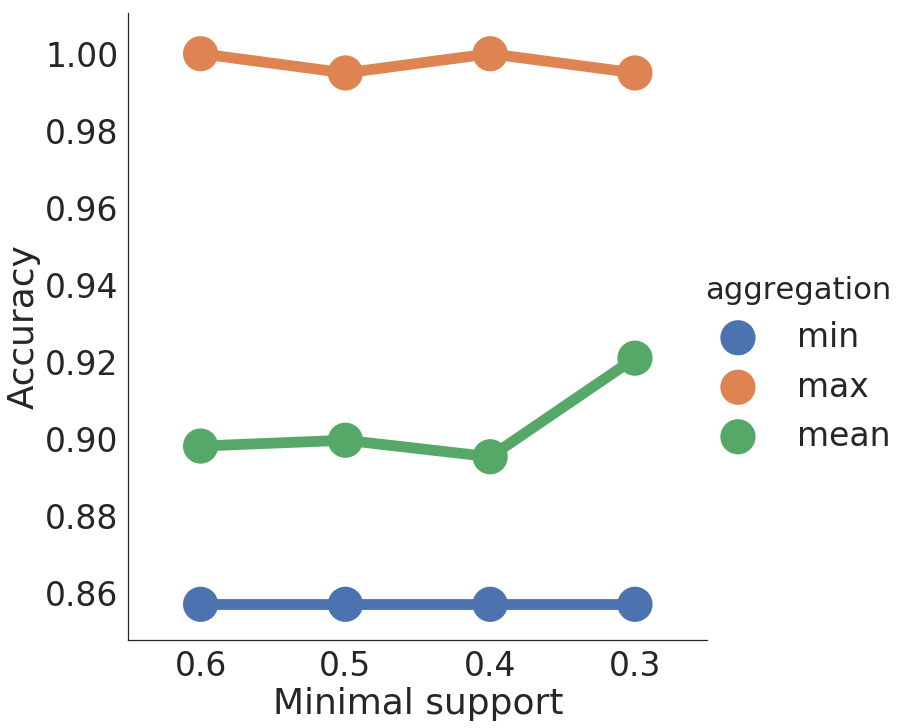

In [104]:
# plt.figure(figsize=(12, 9))
plot_df = fmin_accuracy_asl.melt('fmin', var_name='aggregation',  value_name='accuracy')
g = sns.factorplot(x="fmin", y="accuracy", hue='aggregation', data=plot_df, height=11)
ax = g.ax
ax.invert_xaxis()
ax.set_xlabel("Minimal support")
ax.set_ylabel("Accuracy")
ax.figure.savefig("blocks_accuracy_fmin.png")

In [105]:
fmin_pattern_asl = fmin_asl[["fmin", "pattern_number"]]
fmin_pattern_asl.columns = fmin_pattern_asl.columns.get_level_values(2)
fmin_pattern_asl.columns = ["fmin", "min", "max", "mean", "a", "b", "c"]
fmin_pattern_asl = fmin_pattern_asl.drop(["a","b","c"],axis=1)

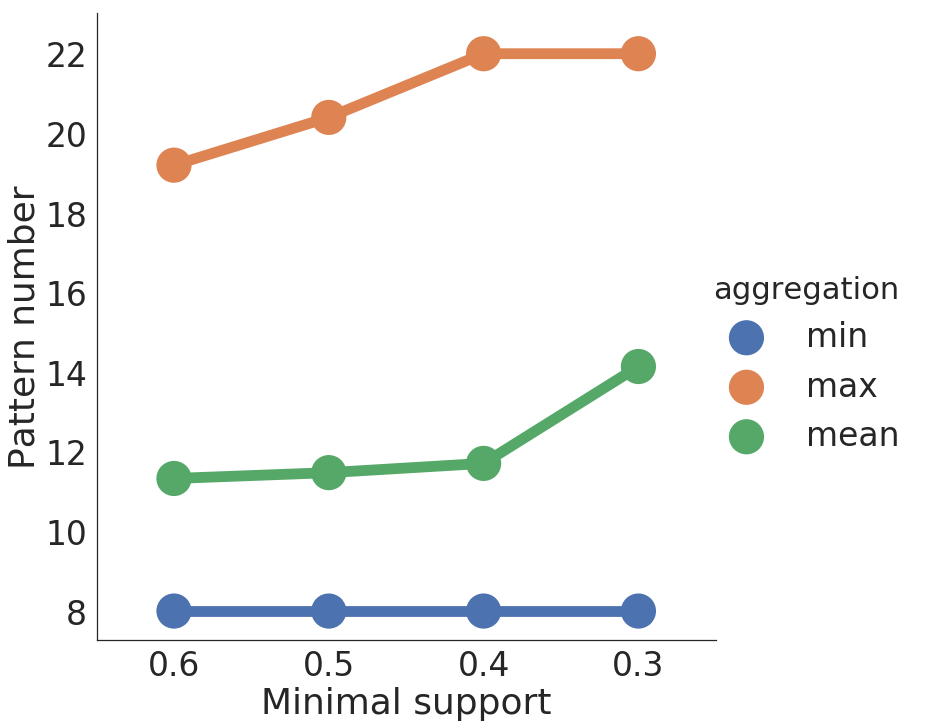

In [135]:
plot_df = fmin_pattern_asl.melt('fmin', var_name='aggregation',  value_name='pattern number')
g = sns.factorplot(x="fmin", y="pattern number", hue='aggregation', data=plot_df, height=11)
ax = g.ax
ax.invert_xaxis()
ax.set_xlabel("Minimal support")
ax.set_ylabel("Pattern number")
ax.figure.savefig("blocks_pattern_fmin.png")

In [132]:
fmin_time_asl = fmin_asl[["fmin", "extraction_time"]]
fmin_time_asl.columns = fmin_time_asl.columns.get_level_values(2)
fmin_time_asl.columns = ["fmin", "min", "max", "mean", "a", "b", "c"]
fmin_time_asl = fmin_time_asl.drop(["a","b","c"],axis=1)

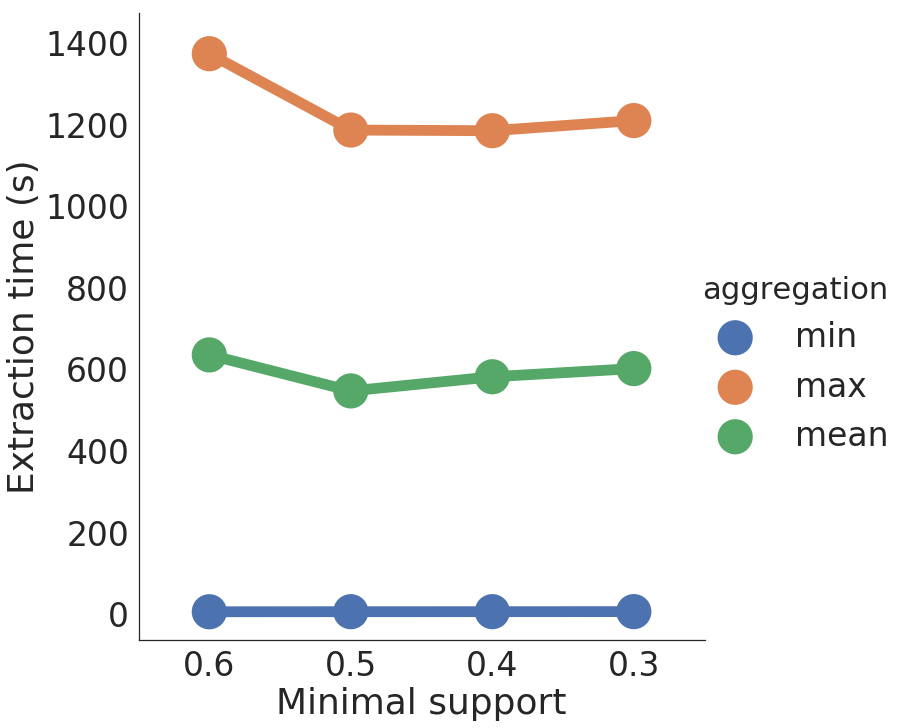

In [134]:
plot_df = fmin_time_asl.melt('fmin', var_name='aggregation',  value_name='time')
g = sns.factorplot(x="fmin", y="time", hue='aggregation', data=plot_df, height=11)
ax = g.ax
ax.invert_xaxis()
ax.set_xlabel("Minimal support")
ax.set_ylabel("Extraction time (s)")
ax.figure.savefig("blocks_time_fmin.png")

In [107]:
gmin_asl = acc_sort.drop(["fmin", "max_size", "svc_C"], 
                         axis=1).groupby(by='gmin').agg(['min', 'max', 'mean']
                                                       ).reset_index()

In [108]:
gmin_accuracy_asl = gmin_asl[["gmin", "accuracy"]]
gmin_accuracy_asl.columns = gmin_accuracy_asl.columns.get_level_values(2)
gmin_accuracy_asl.columns = ["gmin", "min", "max", "mean", "a", "b", "c"]
gmin_accuracy_asl = gmin_accuracy_asl.drop(["a","b","c"],axis=1)

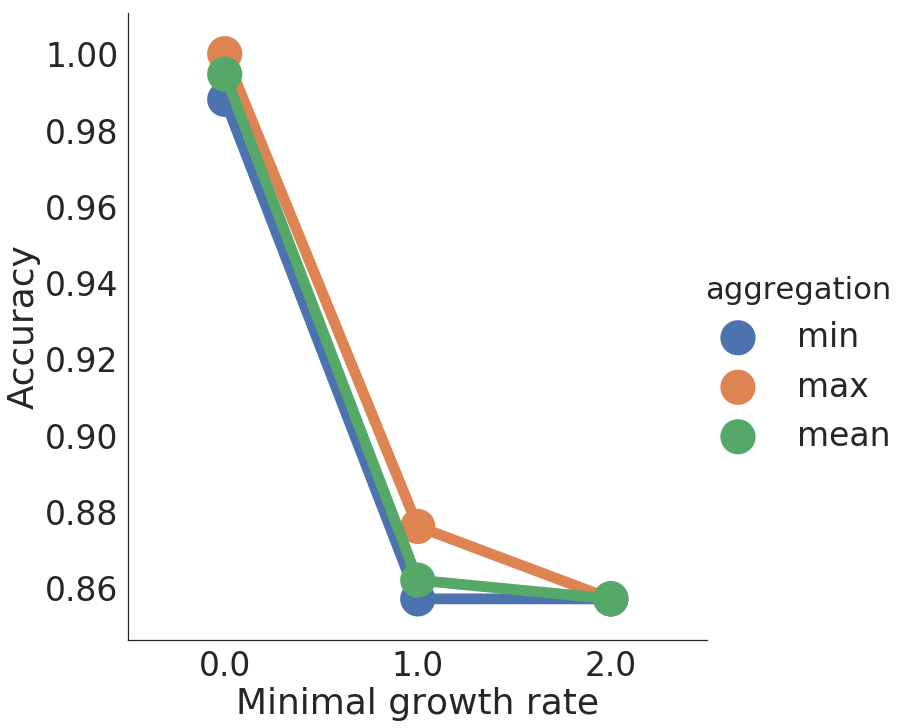

In [109]:
plot_df = gmin_accuracy_asl.melt('gmin', var_name='aggregation',  value_name='accuracy')
g = sns.factorplot(x="gmin", y="accuracy", hue='aggregation', data=plot_df, height=11)
ax = g.ax
# ax.invert_xaxis()
ax.set_xlabel("Minimal growth rate")
ax.set_ylabel("Accuracy")
ax.figure.savefig("blocks_accuracy_gmin.png")

In [110]:
gmin_pattern_asl = gmin_asl[["gmin", "pattern_number"]]
gmin_pattern_asl.columns = gmin_pattern_asl.columns.get_level_values(2)
gmin_pattern_asl.columns = ["gmin", "min", "max", "mean", "a", "b", "c"]
gmin_pattern_asl = gmin_pattern_asl.drop(["a","b","c"],axis=1)

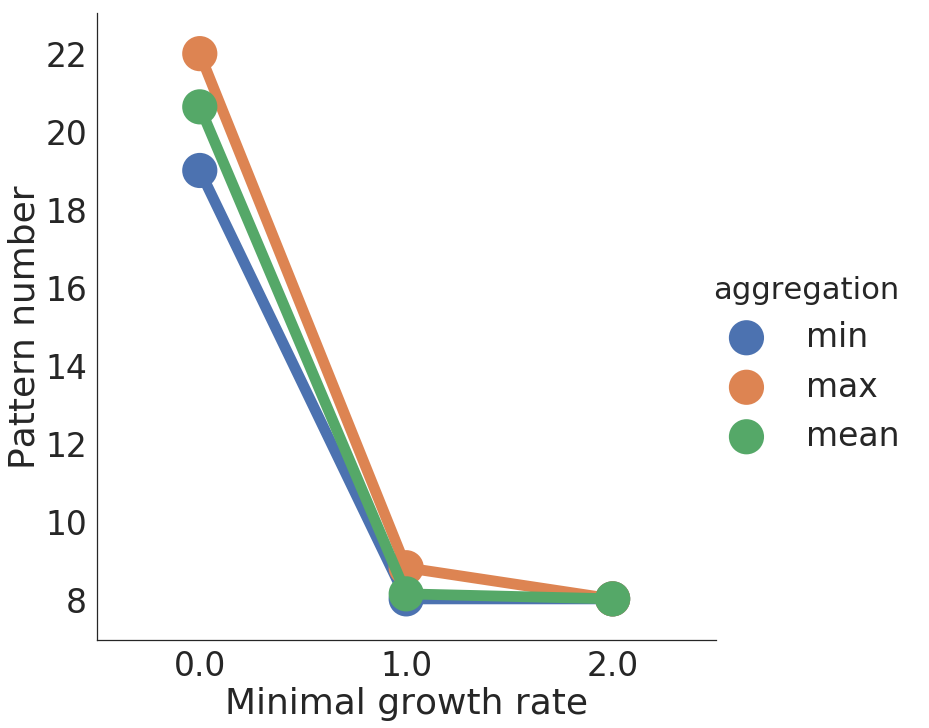

In [111]:
plot_df = gmin_pattern_asl.melt('gmin', var_name='aggregation',  value_name='pattern number')
g = sns.factorplot(x="gmin", y="pattern number", hue='aggregation', data=plot_df, height=11)
ax = g.ax
# ax.invert_xaxis()
ax.set_xlabel("Minimal growth rate")
ax.set_ylabel("Pattern number")
ax.figure.savefig("blocks_pattern_gmin.png")

In [138]:
gmin_time_asl = gmin_asl[["gmin", "extraction_time"]]
gmin_time_asl.columns = gmin_time_asl.columns.get_level_values(2)
gmin_time_asl.columns = ["gmin", "min", "max", "mean", "a", "b", "c"]
gmin_time_asl = gmin_time_asl.drop(["a","b","c"],axis=1)

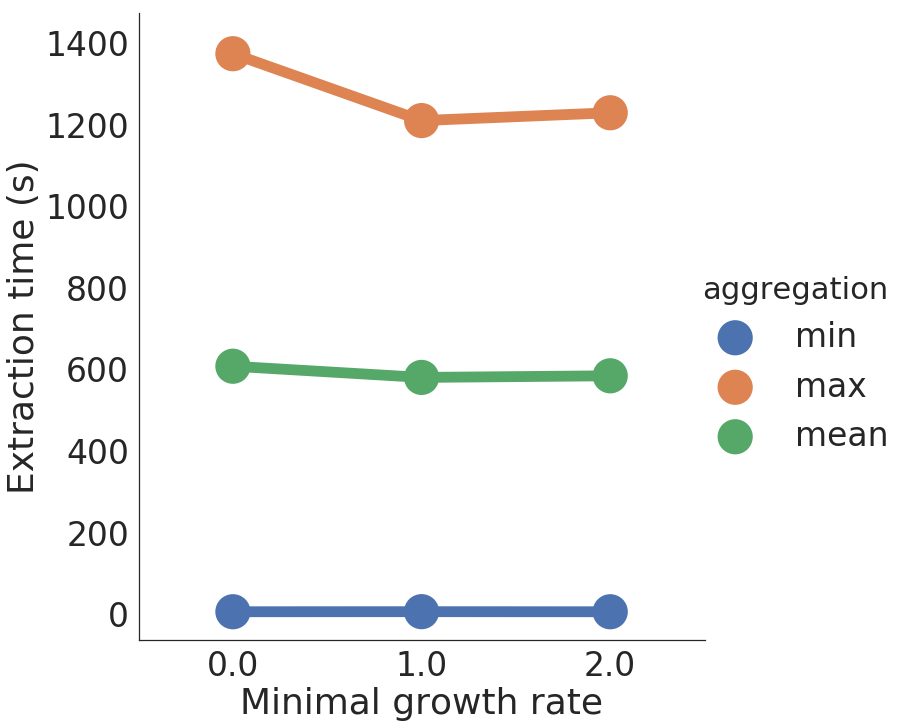

In [139]:
plot_df = gmin_time_asl.melt('gmin', var_name='aggregation',  value_name='time')
g = sns.factorplot(x="gmin", y="time", hue='aggregation', data=plot_df, height=11)
ax = g.ax
# ax.invert_xaxis()
ax.set_xlabel("Minimal growth rate")
ax.set_ylabel("Extraction time (s)")
ax.figure.savefig("blocks_time_gmin.png")

In [112]:
max_size_asl = acc_sort.drop(["fmin", "gmin", "svc_C"], 
                         axis=1).groupby(by='max_size').agg(['min', 'max', 'mean']
                                                       ).reset_index()

In [113]:
size_accuracy_asl = max_size_asl[["max_size", "accuracy"]]
size_accuracy_asl.columns = size_accuracy_asl.columns.get_level_values(2)
size_accuracy_asl.columns = ["max_size", "min", "max", "mean", "a", "b", "c"]
size_accuracy_asl = size_accuracy_asl.drop(["a","b","c"],axis=1)

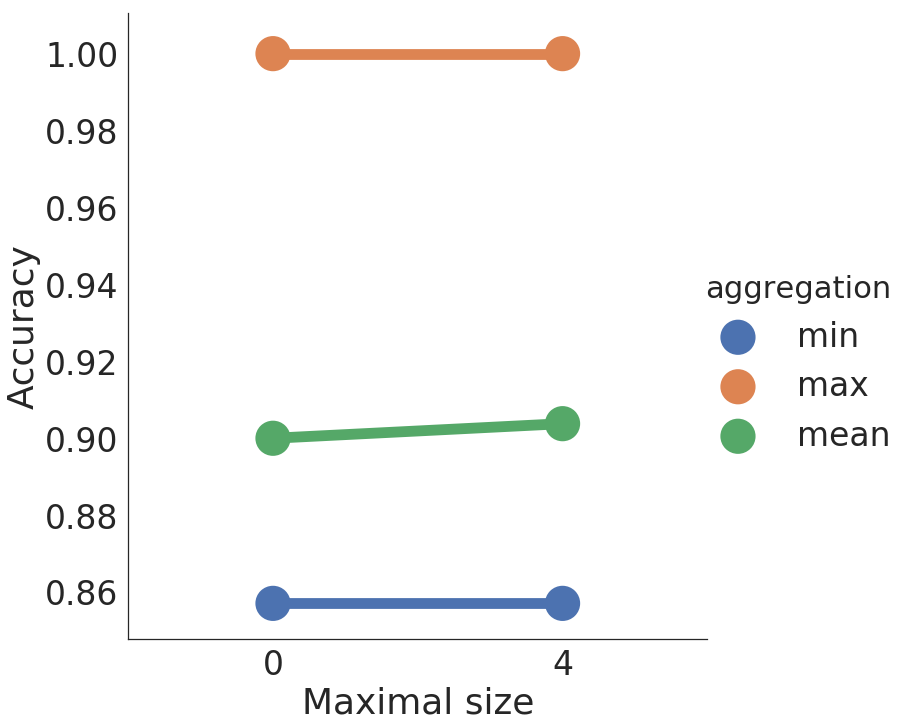

In [116]:
plot_df = size_accuracy_asl.melt('max_size', var_name='aggregation',  value_name='accuracy')
g = sns.factorplot(x="max_size", y="accuracy", hue='aggregation', data=plot_df, height=11)
ax = g.ax
# ax.invert_xaxis()
ax.set_xlabel("Maximal size")
ax.set_ylabel("Accuracy")
ax.figure.savefig("blocks_accuracy_size.png")

In [117]:
size_pattern_asl = max_size_asl[["max_size", "pattern_number"]]
size_pattern_asl.columns = size_pattern_asl.columns.get_level_values(2)
size_pattern_asl.columns = ["max_size", "min", "max", "mean", "a", "b", "c"]
size_pattern_asl = size_pattern_asl.drop(["a","b","c"],axis=1)

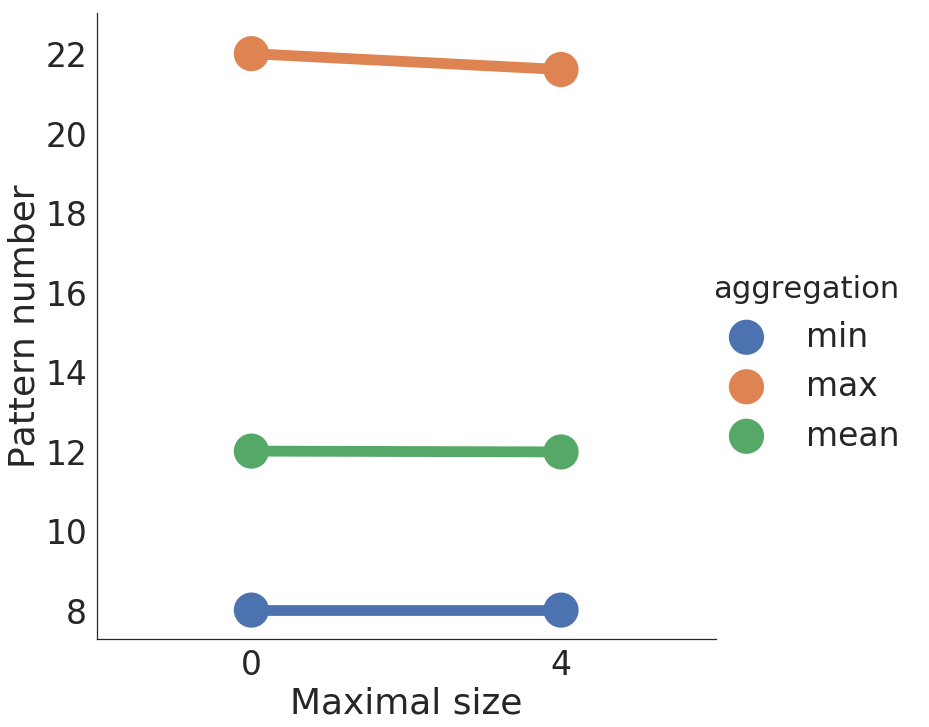

In [118]:
plot_df = size_pattern_asl.melt('max_size', var_name='aggregation',  value_name='pattern number')
g = sns.factorplot(x="max_size", y="pattern number", hue='aggregation', data=plot_df, height=11)
ax = g.ax
# ax.invert_xaxis()
ax.set_xlabel("Maximal size")
ax.set_ylabel("Pattern number")
ax.figure.savefig("blocks_pattern_size.png")

In [129]:
size_time_asl = max_size_asl[["max_size", "extraction_time"]]
size_time_asl.columns = size_time_asl.columns.get_level_values(2)
size_time_asl.columns = ["max_size", "min", "max", "mean", "a", "b", "c"]
size_time_asl = size_time_asl.drop(["a","b","c"],axis=1)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


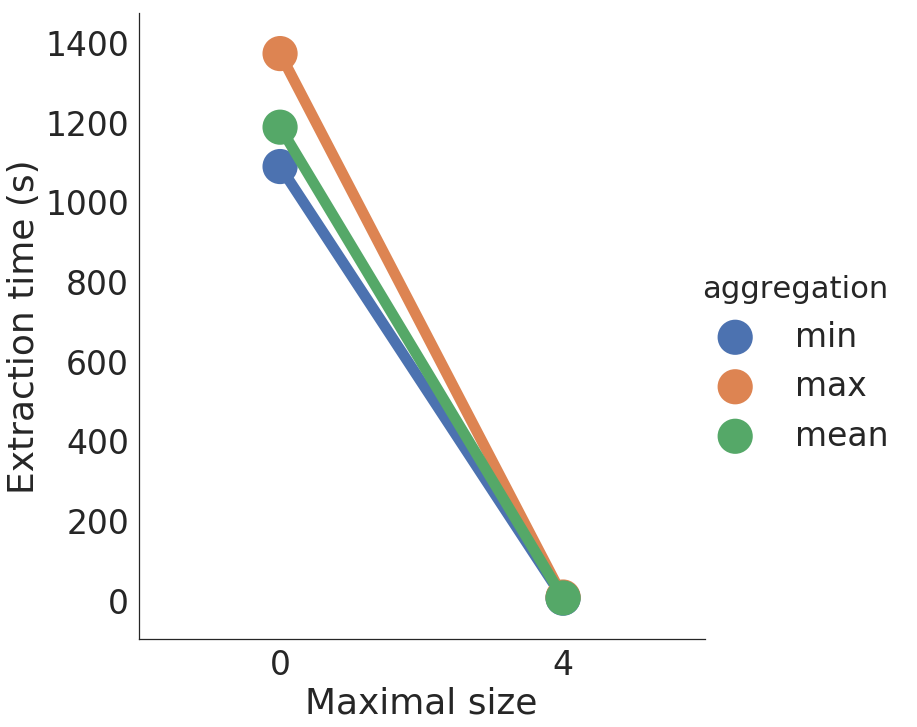

In [130]:
plot_df = size_time_asl.melt('max_size', var_name='aggregation',  value_name='time')
g = sns.factorplot(x="max_size", y="time", hue='aggregation', data=plot_df, height=11)
ax = g.ax
# ax.invert_xaxis()
ax.set_xlabel("Maximal size")
ax.set_ylabel("Extraction time (s)")
ax.figure.savefig("blocks_time_size.png")

In [12]:
acc_sort

fmin gmin max_size   svc_C accuracy        pattern_number          \
                                  mean    std           mean     std   
0   0.2  0.0        4    10.0    0.722  0.017        2628.80  125.67   
1   0.3  1.0        4    10.0    0.692  0.019         315.40   39.93   
2   0.2  1.0        4    10.0    0.692  0.047         909.00  104.43   
3   0.4  1.0        4    10.0    0.690  0.023         100.00   11.38   
4   0.4  1.0        0    10.0    0.678  0.018         314.60   55.46   
5   0.3  0.0        4    10.0    0.678  0.052        1049.20   70.34   
6   0.4  0.0        4    10.0    0.671  0.083         465.60   74.99   
7   0.6  0.0        4    10.0    0.669  0.055          83.60    8.11   
8   0.4  2.0        4    10.0    0.667  0.033          77.40   12.66   
9   0.3  1.0        0    10.0    0.667  0.050        1010.00  215.22   
10  0.3  2.0        4    10.0    0.664  0.010         219.80   13.44   
11  0.4  0.0        0   100.0    0.662  0.031        1669.20  274.00   
12  0.5  1.0        0    10.0    0.662  0.040          65.00   29.09   
13  0.2  2.0        4   100.0    0.662  0.068         571.60   13.90   
14  0.3  0.0        0   100.0    0.658  0.067        4055.25  662.35   
15  0.5  1.0        4    10.0    0.653  0.015          30.20    2.28   
16  0.4  2.0        0    10.0    0.653  0.024         178.00   12.75   
17  0.5  2.0        0    10.0    0.651  0.021          34.00    4.64   
18  0.5  0.0        0   100.0    0.648  0.052         532.80  214.94   
19  0.5  0.0        4    10.0    0.648  0.059         183.00   24.62   
20  0.6  1.0        0   100.0    0.641  0.027          28.40    5.81   
21  0.3  2.0        0   100.0    0.641  0.035         611.60  101.81   
22  0.6  0.0        0    10.0    0.637  0.048         243.80   92.89   
23  0.6  2.0        0   100.0    0.634  0.026          16.20    3.03   
24  0.5  2.0        4  1000.0    0.632  0.039          22.60    1.95   
25  0.6  2.0        4    10.0    0.628  0.031          10.80    1.30   
26  0.6  2.0        4     1.0    0.628  0.033          10.80    1.30   
27  0.6  1.0        4     1.0    0.607  0.052          14.60    2.30   

   extraction_time            time          
              mean     std    mean     std  
0            30.74    0.69  199.94    8.95  
1            23.57    0.79   42.92    2.77  
2            29.62    0.69   87.29    6.66  
3            23.74    1.61   32.24    2.84  
4           321.01  110.97  362.84  126.88  
5            23.22    0.98   90.30    4.40  
6            22.14    2.14   64.91    8.18  
7            11.45    1.04   17.09    1.90  
8            17.60    0.52   22.24    0.94  
9           684.83  435.77  754.51  444.67  
10           22.99    0.40   36.02    1.28  
11          553.75  474.36  704.96  487.50  
12           26.26    5.45   30.29    6.59  
13           61.41   12.20  122.15   10.40  
14          564.48  276.66  826.72  306.71  
15           14.56    0.76   16.64    0.67  
16          245.72  177.28  256.17  176.71  
17           26.20    3.23   28.47    3.17  
18           27.41    5.24   61.74   18.41  
19           15.30    1.23   26.42    2.49  
20           14.42    1.44   16.47    1.53  
21          611.84  267.93  650.82  267.02  
22           14.85    2.98   30.63    8.83  
23           15.57    1.27   17.04    1.57  
24           15.52    1.02   17.16    0.99  
25           11.25    0.46   12.31    0.52  
26           11.25    0.46   12.31    0.52  
27           12.35    2.75   13.66    2.90

In [92]:
print(acc_sort.head(10).to_latex(index=False))

\begin{tabular}{rrrrrrrrrrrr}
\toprule
fmin & gmin & max\_size & svc\_C & \multicolumn{2}{l}{accuracy} & \multicolumn{2}{l}{pattern\_number} & \multicolumn{2}{l}{extraction\_time} & \multicolumn{2}{l}{time} \\
     &     mean &    std &           mean &     std &            mean &     std &    mean &     std \\
\midrule
 0.2 &  0.0 &        4 &  10.0 &    0.722 &  0.017 &         2628.8 &  125.67 &           30.74 &    0.69 &  199.94 &    8.95 \\
 0.3 &  1.0 &        4 &  10.0 &    0.692 &  0.019 &          315.4 &   39.93 &           23.57 &    0.79 &   42.92 &    2.77 \\
 0.2 &  1.0 &        4 &  10.0 &    0.692 &  0.047 &          909.0 &  104.43 &           29.62 &    0.69 &   87.29 &    6.66 \\
 0.4 &  1.0 &        4 &  10.0 &    0.690 &  0.023 &          100.0 &   11.38 &           23.74 &    1.61 &   32.24 &    2.84 \\
 0.4 &  1.0 &        0 &  10.0 &    0.678 &  0.018 &          314.6 &   55.46 &          321.01 &  110.97 &  362.84 &  126.88 \\
 0.3 &  0.0 &        4 &  10.0 & 

In [93]:
pattern_sort = svc_agg_asl.sort_values(by=
                      [('pattern_number', 'mean'), ('accuracy', 'mean'), ('accuracy', 'std')], 
                      ascending=[True, False, True]).round(round_dict).reset_index()
pattern_sort = pattern_sort.drop('level_3', axis=1)

In [94]:
pattern_sort.head(10)

fmin gmin max_size   svc_C accuracy        pattern_number         \
                                 mean    std           mean    std   
0  0.6  2.0        4    10.0    0.628  0.031           10.8   1.30   
1  0.6  2.0        4     1.0    0.628  0.033           10.8   1.30   
2  0.6  1.0        4     1.0    0.607  0.052           14.6   2.30   
3  0.6  2.0        0   100.0    0.634  0.026           16.2   3.03   
4  0.5  2.0        4  1000.0    0.632  0.039           22.6   1.95   
5  0.6  1.0        0   100.0    0.641  0.027           28.4   5.81   
6  0.5  1.0        4    10.0    0.653  0.015           30.2   2.28   
7  0.5  2.0        0    10.0    0.651  0.021           34.0   4.64   
8  0.5  1.0        0    10.0    0.662  0.040           65.0  29.09   
9  0.4  2.0        4    10.0    0.667  0.033           77.4  12.66   

  extraction_time         time        
             mean   std   mean   std  
0           11.25  0.46  12.31  0.52  
1           11.25  0.46  12.31  0.52  
2           12.35  2.75  13.66  2.90  
3           15.57  1.27  17.04  1.57  
4           15.52  1.02  17.16  0.99  
5           14.42  1.44  16.47  1.53  
6           14.56  0.76  16.64  0.67  
7           26.20  3.23  28.47  3.17  
8           26.26  5.45  30.29  6.59  
9           17.60  0.52  22.24  0.94

In [159]:
pattern_sort = svc_agg_asl.sort_values(by=
                      [('extraction_time', 'mean'), ('accuracy', 'mean'), ('accuracy', 'std'), ('pattern_number', 'mean')], 
                      ascending=[True, False, True, True]).round(round_dict).reset_index()
pattern_sort = pattern_sort.drop('level_3', axis=1)

In [160]:
pattern_sort.head(10)

fmin gmin max_size   svc_C accuracy        pattern_number         \
                                 mean    std           mean    std   
0  0.6  2.0        4    10.0    0.628  0.031           10.8   1.30   
1  0.6  2.0        4     1.0    0.628  0.033           10.8   1.30   
2  0.6  0.0        4    10.0    0.669  0.055           83.6   8.11   
3  0.6  1.0        4     1.0    0.607  0.052           14.6   2.30   
4  0.6  1.0        0   100.0    0.641  0.027           28.4   5.81   
5  0.5  1.0        4    10.0    0.653  0.015           30.2   2.28   
6  0.6  0.0        0    10.0    0.637  0.048          243.8  92.89   
7  0.5  0.0        4    10.0    0.648  0.059          183.0  24.62   
8  0.5  2.0        4  1000.0    0.632  0.039           22.6   1.95   
9  0.6  2.0        0   100.0    0.634  0.026           16.2   3.03   

  extraction_time         time        
             mean   std   mean   std  
0           11.25  0.46  12.31  0.52  
1           11.25  0.46  12.31  0.52  
2           11.45  1.04  17.09  1.90  
3           12.35  2.75  13.66  2.90  
4           14.42  1.44  16.47  1.53  
5           14.56  0.76  16.64  0.67  
6           14.85  2.98  30.63  8.83  
7           15.30  1.23  26.42  2.49  
8           15.52  1.02  17.16  0.99  
9           15.57  1.27  17.04  1.57

In [95]:
print(pattern_sort.head(10).to_latex(index=False))

\begin{tabular}{rrrrrrrrrrrr}
\toprule
fmin & gmin & max\_size &   svc\_C & \multicolumn{2}{l}{accuracy} & \multicolumn{2}{l}{pattern\_number} & \multicolumn{2}{l}{extraction\_time} & \multicolumn{2}{l}{time} \\
     &     mean &    std &           mean &    std &            mean &   std &   mean &   std \\
\midrule
 0.6 &  2.0 &        4 &    10.0 &    0.628 &  0.031 &           10.8 &   1.30 &           11.25 &  0.46 &  12.31 &  0.52 \\
 0.6 &  2.0 &        4 &     1.0 &    0.628 &  0.033 &           10.8 &   1.30 &           11.25 &  0.46 &  12.31 &  0.52 \\
 0.6 &  1.0 &        4 &     1.0 &    0.607 &  0.052 &           14.6 &   2.30 &           12.35 &  2.75 &  13.66 &  2.90 \\
 0.6 &  2.0 &        0 &   100.0 &    0.634 &  0.026 &           16.2 &   3.03 &           15.57 &  1.27 &  17.04 &  1.57 \\
 0.5 &  2.0 &        4 &  1000.0 &    0.632 &  0.039 &           22.6 &   1.95 &           15.52 &  1.02 &  17.16 &  0.99 \\
 0.6 &  1.0 &        0 &   100.0 &    0.641 &  0.027 &   

In [7]:
df[(df.dataset == "blocks")].head(5)

,dataset,method,classifier,fold,kfold,fmin,gmin,max_size,svc_C,pattern_type,closed_multiset,accuracy,pattern_number,extraction_time,time
1666,blocks,occurrence,SVC,0,5,0.6,0.0,0,0.001,relevant,False,0.833333,20,1592.562888,1592.658300
1667,blocks,occurrence,SVC,0,5,0.6,0.0,0,0.010,relevant,False,0.833333,20,1592.562888,1592.657627
1668,blocks,occurrence,SVC,0,5,0.6,0.0,0,0.100,relevant,False,0.833333,20,1592.562888,1592.657661
1669,blocks,occurrence,SVC,0,5,0.6,0.0,0,1.000,relevant,False,1.000000,20,1592.562888,1592.656888
1670,blocks,occurrence,SVC,0,5,0.6,0.0,0,10.000,relevant,False,1.000000,20,1592.562888,1592.655737


In [84]:
attributes = ['fmin', 'gmin', 'max_size', 'svc_C']
drop_columns = ['dataset', 'method', 'classifier', 'pattern_type', 'closed_multiset']
gb_blocks = df.drop('fold', axis=1).drop('kfold', axis=1)[
    (df.dataset == "blocks") & (df.closed_multiset == False)].drop(drop_columns, axis=1).groupby(by=attributes)

In [85]:
aggregate_blocks = gb_blocks.agg(['mean', 'std'])

In [86]:
attributes = ['fmin', 'gmin', 'max_size']
svc_gb_blocks = aggregate_blocks.reset_index().dropna().groupby(by=attributes)

In [87]:
svc_agg_blocks = svc_gb_blocks.apply(lambda x: x[x[('accuracy', 'mean')] == max(x[('accuracy', 'mean')])].drop(attributes, axis=1))

In [122]:
acc_sort = svc_agg_blocks.sort_values(
    by=[('accuracy', 'mean'), ('accuracy', 'std'), ('time', 'mean')], ascending=[False,True, True]).round(round_dict).reset_index()
acc_sort = acc_sort.drop('level_3', axis=1)

In [123]:
print(acc_sort.to_latex(index=False))

\begin{tabular}{rrrrrrrrrrrr}
\toprule
fmin & gmin & max\_size &   svc\_C & \multicolumn{2}{l}{accuracy} & \multicolumn{2}{l}{pattern\_number} & \multicolumn{2}{l}{extraction\_time} & \multicolumn{2}{l}{time} \\
     &     mean &    std &           mean &   std &            mean &     std &     mean &     std \\
\midrule
 0.6 &  0.0 &        4 &   100.0 &    1.000 &  0.000 &          19.20 &  2.39 &            4.71 &    0.20 &     4.79 &    0.20 \\
 0.6 &  0.0 &        4 &  1000.0 &    1.000 &  0.000 &          19.20 &  2.39 &            4.71 &    0.20 &     4.79 &    0.20 \\
 0.6 &  0.0 &        4 &    10.0 &    1.000 &  0.000 &          19.20 &  2.39 &            4.71 &    0.20 &     4.79 &    0.20 \\
 0.4 &  0.0 &        0 &   100.0 &    1.000 &  0.000 &          22.00 &  0.00 &         1097.64 &  127.02 &  1097.73 &  127.02 \\
 0.4 &  0.0 &        0 &  1000.0 &    1.000 &  0.000 &          22.00 &  0.00 &         1097.64 &  127.02 &  1097.74 &  127.02 \\
 0.4 &  0.0 &        0 &   

In [120]:
pattern_sort = svc_agg_blocks.sort_values(by=
                      [('pattern_number', 'mean'), ('accuracy', 'mean'), ('accuracy', 'std'), ('time', 'mean')], 
                      ascending=[True, False, True, True]).round(round_dict).reset_index()
pattern_sort = pattern_sort.drop('level_3', axis=1)

In [124]:
pattern_sort

fmin gmin max_size   svc_C accuracy        pattern_number        \
                                  mean    std           mean   std   
0   0.6  2.0        4   100.0    0.857  0.000           8.00  0.00   
1   0.6  2.0        4  1000.0    0.857  0.000           8.00  0.00   
2   0.6  2.0        4    10.0    0.857  0.000           8.00  0.00   
3   0.5  2.0        4   100.0    0.857  0.000           8.00  0.00   
4   0.5  2.0        4  1000.0    0.857  0.000           8.00  0.00   
5   0.5  2.0        4    10.0    0.857  0.000           8.00  0.00   
6   0.5  2.0        4     1.0    0.857  0.000           8.00  0.00   
7   0.4  1.0        4  1000.0    0.857  0.000           8.00  0.00   
8   0.4  1.0        4    10.0    0.857  0.000           8.00  0.00   
9   0.4  1.0        4     1.0    0.857  0.000           8.00  0.00   
10  0.4  1.0        4   100.0    0.857  0.000           8.00  0.00   
11  0.4  2.0        4   100.0    0.857  0.000           8.00  0.00   
12  0.4  2.0        4    10.0    0.857  0.000           8.00  0.00   
13  0.4  2.0        4  1000.0    0.857  0.000           8.00  0.00   
14  0.4  2.0        4     1.0    0.857  0.000           8.00  0.00   
15  0.6  1.0        4    10.0    0.857  0.000           8.00  0.00   
16  0.6  1.0        4   100.0    0.857  0.000           8.00  0.00   
17  0.6  1.0        4     1.0    0.857  0.000           8.00  0.00   
18  0.6  1.0        4  1000.0    0.857  0.000           8.00  0.00   
19  0.5  2.0        0    10.0    0.857  0.000           8.00  0.00   
20  0.5  2.0        0   100.0    0.857  0.000           8.00  0.00   
21  0.5  2.0        0  1000.0    0.857  0.000           8.00  0.00   
22  0.5  2.0        0     1.0    0.857  0.000           8.00  0.00   
23  0.5  1.0        0  1000.0    0.857  0.000           8.00  0.00   
24  0.5  1.0        0   100.0    0.857  0.000           8.00  0.00   
25  0.5  1.0        0    10.0    0.857  0.000           8.00  0.00   
26  0.4  1.0        0   100.0    0.857  0.000           8.00  0.00   
27  0.4  1.0        0    10.0    0.857  0.000           8.00  0.00   
28  0.4  1.0        0  1000.0    0.857  0.000           8.00  0.00   
29  0.4  1.0        0     1.0    0.857  0.000           8.00  0.00   
..  ...  ...      ...     ...      ...    ...            ...   ...   
47  0.5  1.0        4  1000.0    0.876  0.043           8.20  0.45   
48  0.5  1.0        4     1.0    0.876  0.043           8.20  0.45   
49  0.3  1.0        4   100.0    0.876  0.031           8.80  0.84   
50  0.3  1.0        4  1000.0    0.876  0.031           8.80  0.84   
51  0.3  1.0        4    10.0    0.876  0.031           8.80  0.84   
52  0.3  1.0        4     1.0    0.876  0.031           8.80  0.84   
53  0.6  0.0        0    10.0    0.988  0.017          19.00  1.41   
54  0.6  0.0        0   100.0    0.988  0.017          19.00  1.41   
55  0.6  0.0        0  1000.0    0.988  0.017          19.00  1.41   
56  0.6  0.0        4   100.0    1.000  0.000          19.20  2.39   
57  0.6  0.0        4  1000.0    1.000  0.000          19.20  2.39   
58  0.6  0.0        4    10.0    1.000  0.000          19.20  2.39   
59  0.5  0.0        0  1000.0    0.992  0.014          19.67  1.53   
60  0.5  0.0        0   100.0    0.992  0.014          19.67  1.53   
61  0.5  0.0        0    10.0    0.992  0.014          19.67  1.53   
62  0.5  0.0        4   100.0    0.995  0.011          20.40  0.89   
63  0.5  0.0        4    10.0    0.995  0.011          20.40  0.89   
64  0.5  0.0        4  1000.0    0.995  0.011          20.40  0.89   
65  0.4  0.0        4  1000.0    0.995  0.011          21.20  1.30   
66  0.4  0.0        4    10.0    0.995  0.011          21.20  1.30   
67  0.4  0.0        4   100.0    0.995  0.011          21.20  1.30   
68  0.3  0.0        4  1000.0    0.995  0.011          21.60  1.52   
69  0.3  0.0        4    10.0    0.995  0.011          21.60  1.52   
70  0.3  0.0        4   100.0    0.995  0.011          21.60  1.52   
71  0.4  0.0 

In [121]:
print(pattern_sort.to_latex(index=False))

\begin{tabular}{rrrrrrrrrrrr}
\toprule
fmin & gmin & max\_size &   svc\_C & \multicolumn{2}{l}{accuracy} & \multicolumn{2}{l}{pattern\_number} & \multicolumn{2}{l}{extraction\_time} & \multicolumn{2}{l}{time} \\
     &     mean &    std &           mean &   std &            mean &     std &     mean &     std \\
\midrule
 0.6 &  2.0 &        4 &   100.0 &    0.857 &  0.000 &           8.00 &  0.00 &            4.65 &    0.19 &     4.69 &    0.19 \\
 0.6 &  2.0 &        4 &  1000.0 &    0.857 &  0.000 &           8.00 &  0.00 &            4.65 &    0.19 &     4.69 &    0.19 \\
 0.6 &  2.0 &        4 &    10.0 &    0.857 &  0.000 &           8.00 &  0.00 &            4.65 &    0.19 &     4.69 &    0.19 \\
 0.5 &  2.0 &        4 &   100.0 &    0.857 &  0.000 &           8.00 &  0.00 &            4.80 &    0.28 &     4.84 &    0.28 \\
 0.5 &  2.0 &        4 &  1000.0 &    0.857 &  0.000 &           8.00 &  0.00 &            4.80 &    0.28 &     4.84 &    0.28 \\
 0.5 &  2.0 &        4 &   